<a href="https://colab.research.google.com/github/Kamilya2020/Classification/blob/main/Classification_crises_epilepsie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importation des bibliothèques**

In [1]:
import tensorflow 
import tensorflow as tf
from tensorflow.keras import backend as k
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Conv2D, MaxPooling2D,Flatten,BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers
import numpy

from sklearn import preprocessing

from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler


import tensorflow as tf
print(tf.__version__)

import numpy as np
print(np.__version__)

numpy.random.seed(2)
import pandas as pd


2.8.2
1.21.6


**Importation de la base**

In [4]:

dataset_e1= pd.read_csv("./stand_norm_e1.txt",delimiter=" ",header=None)
dataset_e1=numpy.array(dataset_e1,float)

X_e1 = dataset_e1[:,(0,1,2,3,4,5,6)]
#m=np.max(X_e1)
print(X_e1.shape)
dataset_e2= pd.read_csv("./stand_norm_e2.txt",delimiter=" ",header=None)
dataset_e2=numpy.array(dataset_e2,float)

X_e2 = dataset_e2[:,(0,1,2,3,4,5,6)]
#n=np.max(X_e2)
#X_e2=X_e2/n
print(X_e2.shape)
'''normalizing data with MinMaxScaler'''
#scaler = preprocessing.MinMaxScaler()
#X_e1_scaled = scaler.fit_transform(X_e1)
#X_e2_scaled = scaler.fit_transform(X_e2)


x_train_test=np.zeros((X_e1.shape[0],X_e1.shape[1],2))
x_train_test[:,:,0]=X_e1
x_train_test[:,:,1]=X_e2
print(x_train_test.shape)


#print(x_test.shape)
dataset_output= pd.read_csv("./y2_e2.txt",delimiter=" ",header=None)
dataset_output=numpy.array(dataset_output,float)
dataset_output_new= dataset_output.reshape(dataset_output.shape[0], )

(13762, 7)
(13762, 7)
(13762, 7, 2)


FileNotFoundError: ignored

In [ ]:
print(x_train_test)

[[[-0.38244  -0.480229]
  [ 0.505189  1.716631]
  [ 0.217562  0.354079]
  ...
  [-0.455253 -0.460837]
  [-0.360255 -0.457283]
  [-0.267133 -0.267133]]

 [[-0.424772 -0.494075]
  [ 0.023558  1.887786]
  [ 0.183694  0.643721]
  ...
  [-0.465147 -0.384227]
  [-0.399712 -0.476274]
  [-0.308448 -0.308448]]

 [[ 0.781768 -0.275606]
  [ 0.236212  1.479074]
  [ 0.192097  1.047914]
  ...
  [ 0.304319 -0.607677]
  [ 0.812264 -0.229191]
  [-0.349159 -0.349159]]

 ...

 [[-0.382491 -0.482518]
  [-0.24978  -0.280554]
  [-0.255483 -0.530712]
  ...
  [-0.377275 -0.428467]
  [-0.350391 -0.43643 ]
  [ 1.227973  1.227973]]

 [[-0.252338 -0.057465]
  [-0.192436 -0.041017]
  [-0.156271  0.648364]
  ...
  [-0.039089  0.673583]
  [-0.25583  -0.194975]
  [ 1.250906  1.250906]]

 [[-0.397746 -0.459311]
  [-0.248198 -0.354015]
  [-0.268403 -0.413529]
  ...
  [-0.343039 -0.303634]
  [-0.370069 -0.430366]
  [ 1.274114  1.274114]]]


**Répartition entre l'apprentissage et test**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train_test, dataset_output_new, test_size=0.10, random_state=45)

In [ ]:
x_train_new=x_train
x_test_new=x_test

**Préparation des sorties du modèle**

In [ ]:

print(y_train.shape)

Y_train_new = tensorflow.keras.utils.to_categorical( y_train)
Y_test_new = tensorflow.keras.utils.to_categorical(y_test)
print(Y_train_new.shape)

(12385,)
(12385, 3)


In [ ]:
print(y_test)

[0. 1. 1. ... 1. 1. 1.]


**Préparation des entrées du modèle**

In [ ]:
print (x_train_new.shape)
x_train_new=x_train_new.reshape(x_train_new.shape[0],  x_train_new.shape[1], 2)
x_test_new = x_test_new.reshape(x_test_new.shape[0], x_test_new.shape[1],2 )
print (x_train_new.shape)

(12385, 7, 2)
(12385, 7, 2)


**Construction du modèle**

In [ ]:
from pandas.core.arrays import categorical
def objective(trial):
  #from tensorflow.keras.layers import Dense, Dropout,Conv1D, MaxPooling1D,Flatten,BatchNormalization
  model = Sequential()
  model.add(Conv1D(filters=trial.suggest-categorical("filters",[32,64,128,256,512]),kernel_size=trial.suggest_categorical("kernel_size",[1,3]),input_shape=input_shape,data_format='channels_first',activation=trial.suggest_categorical("activation",["relu","sigmoid","tanh"])))
  model.add(BatchNormalization())
  model.add(Conv1D(filters=trial.suggest-categorical("filters",[32,64,128,256,512]), kernel_size=trial.suggest_categorical("kernel_size",[1,3]), activation=trial.suggest_categorical("activation",["relu","sigmoid","tanh"],padding='same')))
  model.add(BatchNormalization())
  model.add(Conv1D(filters=trial.suggest-categorical("filters",[32,64,128,256,512]), kernel_size=trial.suggest_categorical("kernel_size",[1,3]), activation=trial.suggest_categorical("activation",["relu","sigmoid","tanh"],padding='same')))
  model.add(MaxPooling1D(pool_size=2,strides=True))
  model.add(Dropout(0.4))#0.3

  model.add(Conv1D(filters=trial.suggest-categorical("filters",[32,64,128,256,512]), kernel_size=trial.suggest_categorical("kernel_size",[1,3]), activation=trial.suggest_categorical("activation",["relu","sigmoid","tanh"],padding='same')))
  model.add(MaxPooling1D(pool_size=2,strides=True))
  model.add(Dropout(0.4))#0.3

  model.add(Conv1D(filters=trial.suggest-categorical("filters",[32,64,128,256,512]), kernel_size=trial.suggest_categorical("kernel_size",[1,3]), activation=trial.suggest_categorical("activation",["relu","sigmoid","tanh"],padding='same')))
  model.add(MaxPooling1D(pool_size=2,strides=True))
  model.add(Dropout(0.4))#0.3


  model.add(Conv1D(filters=trial.suggest-categorical("filters",[32,64,128,256,512]), kernel_size=trial.suggest_categorical("kernel_size",[1,3]), activation=trial.suggest_categorical("activation",["relu","sigmoid","tanh"],padding='same')))
  model.add(MaxPooling1D(pool_size=2,strides=None))
  model.add(Dropout(0.4))#0.4





  model.add(Flatten()) # Flatten is the input layer of the Fully Connected


  model.add(Dense(200, activation='relu')) # 100 
  lr=trial.suggest_float("lr",1e-5,1e-1,log=True)
  model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
  history =model.fit(x_train_new, Y_train_new, epochs=200, batch_size=1024, verbose=1, validation_split=0.15, callbacks=[checkpointer])
  score = model.evaluate(x_test_new, Y_test_new, verbose=1)
  model.add(BatchNormalization())
  model.add(Dropout(0.5))#0.4

  model.add(Dense(100, activation='relu')) # 100 
  model.add(BatchNormalization())
  model.add(Dropout(0.5))#0.4

#model.add(Dense(2, activation='softmax'))
  model.add(Dense(3, activation='softmax',kernel_regularizer=regularizers.l2(0.001)))

In [ ]:
!pip install --quiet optuna
import optuna 
from optuna.visualization.plot_contour
from optuna.visualization.plot_edf
from optuna.visualization.plot_intermediate_values
optuna.visualization.plot_optimization_history
study=optuna.create_study(sampler=optuna.samplers.RandomSampler(),direction="maximize")
study.optimize(objective,n_trials=10)
print("Number of finished trials:{}".format(len))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 7, 32)             224       
                                                                 
 batch_normalization (BatchN  (None, 7, 32)            128       
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 7, 64)             6208      
                                                                 
 batch_normalization_1 (Batc  (None, 7, 64)            256       
 hNormalization)                                                 
                                                                 
 conv1d_2 (Conv1D)           (None, 7, 128)            24704     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 6, 128)           0

In [ ]:
model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

**Effectuer l'apprentissage**

In [ ]:
checkpointer = ModelCheckpoint(filepath='./'+'_best_weights.h5', verbose=1, monitor='val_loss', mode='auto', save_best_only=True) #save at each epoch if the validation decreased

history =model.fit(x_train_new, Y_train_new, epochs=200, batch_size=1024, verbose=1, validation_split=0.15, callbacks=[checkpointer])

model.save('weights_cnn2_t1.h5')

Epoch 1/200
11/11 [==============================] - ETA: 0s - loss: 1.5431 - accuracy: 0.3920 - precision: 0.4033 - recall: 0.2887
Epoch 1: val_loss improved from inf to 1.05065, saving model to ./_best_weights.h5
11/11 [==============================] - 19s 221ms/step - loss: 1.5431 - accuracy: 0.3920 - precision: 0.4033 - recall: 0.2887 - val_loss: 1.0507 - val_accuracy: 0.6028 - val_precision: 0.4795 - val_recall: 0.0188
Epoch 2/200
11/11 [==============================] - ETA: 0s - loss: 1.2291 - accuracy: 0.4930 - precision: 0.5387 - recall: 0.3281
Epoch 2: val_loss improved from 1.05065 to 1.00456, saving model to ./_best_weights.h5
11/11 [==============================] - 1s 58ms/step - loss: 1.2291 - accuracy: 0.4930 - precision: 0.5387 - recall: 0.3281 - val_loss: 1.0046 - val_accuracy: 0.6098 - val_precision: 0.6368 - val_recall: 0.0651
Epoch 3/200
11/11 [==============================] - ETA: 0s - loss: 1.0559 - accuracy: 0.6226 - precision: 0.6737 - recall: 0.4974
Epoch 3:

**Evalutations**

In [ ]:

score = model.evaluate(x_test_new, Y_test_new, verbose=1)
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])
print (score)

44/44 [==============================] - 1s 10ms/step - loss: 0.5492 - accuracy: 0.8279 - precision: 0.8279 - recall: 0.8279
[0.5491651296615601, 0.827886700630188, 0.827886700630188, 0.827886700630188]


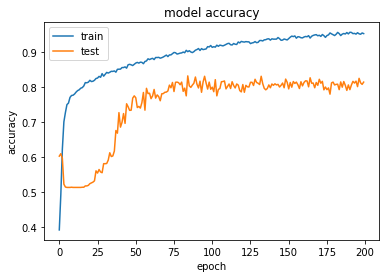

In [ ]:
import matplotlib.pyplot as plt # shorcut for a plot function
plt.plot(history.history['accuracy']) # training accuracy
plt.plot(history.history['val_accuracy']) # validation accuracy
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

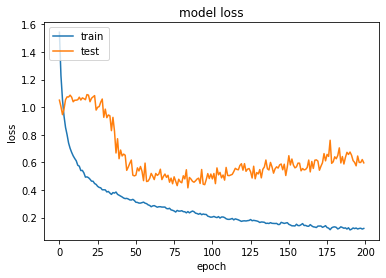

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:

predictions = model.predict(x_test_new,  verbose=1)
print ("predicted images size :",predictions.shape)
print(predictions)
print(Y_test_new.shape)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score
threshold_confusion = 0.5

print ("\nConfusion matrix:  Custom threshold (for positive) of " +str(threshold_confusion))
y_pred = np.empty((predictions.shape[0]))
y_test = np.empty((predictions.shape[0]))
print(Y_test_new)
for i in range(predictions.shape[0]):
    #print(predictions[i])
    y_pred[i]=np.argmax(predictions[i])
    y_test[i]=np.argmax(Y_test_new[i])
print(y_pred)
print(y_test)  
       
confusion = confusion_matrix(y_test,  y_pred)

print(confusion)

In [ ]:
z=[]
for i in range(len(y_pred_all)):
    if(y_pred_all[i][0]==1):
        z.append(i)
print(z)

In [ ]:
d=[63,2025]
chb=[1864, 5763]
d=numpy.array(d)
chb=numpy.array(chb)
rs=[]
for l in range (2025,5763):
  if((y_pred_all[l][0]==1) and (y_pred_all[l+1][0]==1) and (y_pred_all[l+2][0]==1)):
    rs.append(l)
    continue
  

print(rs)
k=5763-2264

print("the duration before seizure in min is", (k*2)/60)

In [ ]:
dataset_output= pd.read_csv("./y_chb"+ch+"_15min.txt",delimiter=" ",header=None)
dataset_output=numpy.array(dataset_output,float)
dataset_output_new= dataset_output.reshape(dataset_output.shape[0], )

In [ ]:
print(dataset_output_new)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_train_test, dataset_output_new, test_size=0.2, random_state=42)

In [ ]:
x_train_new=x_train
x_test_new=x_test

In [ ]:
print(y_test)

In [ ]:
Y_train_new = tensorflow.keras.utils.to_categorical( y_train)
Y_test_new = tensorflow.keras.utils.to_categorical(y_test)
print(Y_train_new.shape)

In [ ]:
model = Sequential()
model.add(Conv1D(32, kernel_size=3,
                 activation='relu',data_format="channels_last",padding='same',
                 input_shape=(7,2)))
model.add(BatchNormalization())
model.add(Conv1D(64, 3, activation='relu',padding='same'))

model.add(BatchNormalization())
model.add(Conv1D(128, 3, activation='relu',padding='same'))

model.add(MaxPooling1D(pool_size=2,strides=True))
model.add(Dropout(0.3))#0.1
model.add(Conv1D(512, 3, activation='relu',padding='same'))
model.add(MaxPooling1D(pool_size=2,strides=None))
model.add(Dropout(0.4))#0.1

model.add(Flatten()) # Flatten is the input layer of the Fully Connected
model.add(Dense(100, activation='relu')) # gets input size from flatten
model.add(BatchNormalization())
model.add(Dropout(0.4))#0.2
model.add(Dense(2, activation='softmax',kernel_regularizer=regularizers.l2(0.001)))
model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
checkpointer = ModelCheckpoint(filepath='./'+'_best_weights_1h.h5', verbose=1, monitor='val_loss', mode='auto', save_best_only=True) #save at each epoch if the validation decreased

history =model.fit(x_train_new, Y_train_new, epochs=100, batch_size=512, verbose=1, validation_split=0.15, callbacks=[checkpointer])

model.save('weights_cnn2_t1_1h.h5')

In [ ]:
score = model.evaluate(x_test_new, Y_test_new, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
import matplotlib.pyplot as plt # shorcut for a plot function
plt.plot(history.history['accuracy']) # training accuracy
plt.plot(history.history['val_accuracy']) # validation accuracy
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
predictions_1h = model.predict(x_test_new, batch_size=32, verbose=2)

print ("predicted images size :",predictions_1h.shape)
print(predictions_1h)
print(Y_test_new.shape)
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score
threshold_confusion = 0.5
print(y_test)
print ("\nConfusion matrix:  Custom threshold (for positive) of " +str(threshold_confusion))
y_pred_1h = np.empty((predictions_1h.shape[0]))
y_test = np.empty((predictions_1h.shape[0]))
for i in range(predictions_1h.shape[0]):
    
    y_pred_1h[i]=np.argmax(predictions_1h[i])
    y_test[i]=np.argmax(Y_test_new[i])
print(y_pred_1h)
"""  
for i in range (0, len(y_pred_1h)):
  if (y_pred_1h[i]==0):
    y_pred_1h[i]=1
  else: 
    y_pred_1h[i]=0
"""
print(y_test)
confusion = confusion_matrix(y_test,  y_pred_1h)
print (confusion)
numpy.savetxt("./y_pred_1h.txt",y_pred_1h,delimiter=" ",fmt='%f')
print("The accuracy score on this random test-set is  :", accuracy_score(y_test,  y_pred_1h) )

recall=recall_score(y_test,  y_pred_1h, average=None)
av_recall=sum(recall)/2
print("recall",recall, "the avreage recall is ",av_recall)
precision=precision_score(y_test,  y_pred_1h,average=None)
av_precision=sum(precision)/2

print("precision",precision,"the avreage precision is ",av_precision)

F1_score=(2*av_precision*av_recall)/(av_precision+av_recall)
print("F1_score",F1_score)

In [ ]:
predictions_all = model.predict(x_train_test, batch_size=32, verbose=2)
print ("predicted images size :",predictions_all.shape)
print(predictions_all)


In [ ]:
y_pred_all=predictions_all

for i in range(predictions_all.shape[0]):
    
    y_pred_all[i]=np.argmax(predictions_all[i])
print(y_pred_all)

In [ ]:
z=[]
for i in range(len(y_pred_all)):
    if(y_pred_all[i][0]==1):
        z.append(i)
print(z)

In [ ]:
predictions_all = model.predict(x_train_test, batch_size=32, verbose=2)
print ("predicted images size :",predictions_all.shape)
print(predictions_all)

In [ ]:
d=[67,2025]
chb=[3297, 6265, 9859, 13530]
d=numpy.array(d)
chb=numpy.array(chb)
rs=[]
for l in range (67,1864):
  if((y_pred_all[l][0]==1) and (y_pred_all[l+1][0]==1) and (y_pred_all[l+2][0]==1)):
    rs.append(l)
    continue
  

print(rs)
k=1864-68

print("the duration before seizure in min is", (k*2)/60)